In [1]:
import Relativistic_ISCT

In [31]:
import importlib
importlib.reload(Relativistic_ISCT)

<module 'Relativistic_ISCT' from 'd:\\Users\\nsyak\\Desktop\\Speed_of_Sound_and_V_eff\\Relativistic_ISCT.py'>

In [12]:
eos = Relativistic_ISCT.Relativistic_ISCT(eos='vdw')

In [18]:
import numpy as np

Tdata =  np.linspace(1., 1000., 20)
cs_data = [eos.speed_of_s_sq(T, 0.) for T in Tdata]

error for T=-1.0, mu=0.0


# Plotting speed of sound

In [35]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
labels = ['vdw', 'IST', 'ISCT', 'ISCT2']

data_folder = 'cs_sq_fulldata'

# baryons

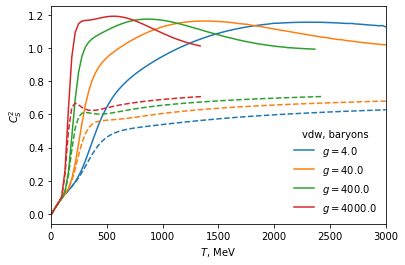

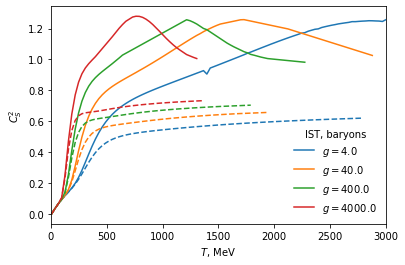

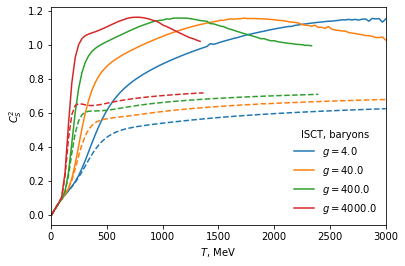

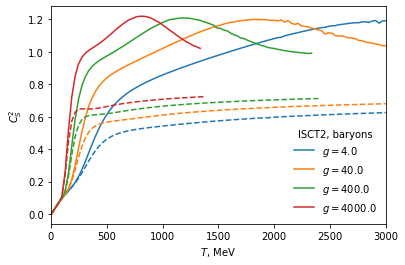

In [37]:
# plots for different g
g_array = [4., 40.,400.,4000.]

particle_type = 'baryons'
mu = 0.
R = 0.39

for label in labels:

    b = 1.

    for g in g_array:
        filepath = f'cs_sq_fulldata_{particle_type}_b_{b}_{label}_g_{g}_R_{R}_mu_{mu}_.csv'
        df = pd.read_csv(os.path.join(data_folder, filepath))
        mask = df.sp_of_snd_sq.isna()
        df = df[np.invert(mask)]
        plt.plot( df['T'], df['sp_of_snd_sq'], label=f'$g={g}$')
    
    plt.gca().set_prop_cycle(None)
    
    b = 0.

    for g in g_array:
        filepath = f'cs_sq_fulldata_{particle_type}_b_{b}_{label}_g_{g}_R_{R}_mu_{mu}_.csv'
        df = pd.read_csv(os.path.join(data_folder, filepath))
        mask = df.sp_of_snd_sq.isna()
        df = df[np.invert(mask)]
        plt.plot( df['T'], df['sp_of_snd_sq'], '--')
    
    plt.xlim(0, 3e3)

    plt.xlabel('$T$, MeV')
    plt.ylabel('$C_{S}^2$')

    plt.legend(frameon=False, title=f'{label}, {particle_type}')
    plt.show()

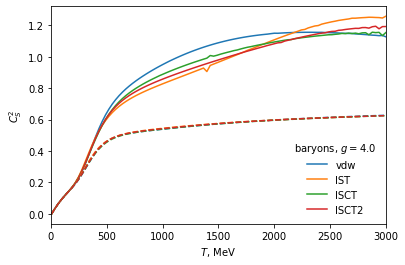

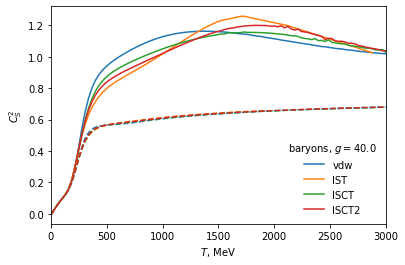

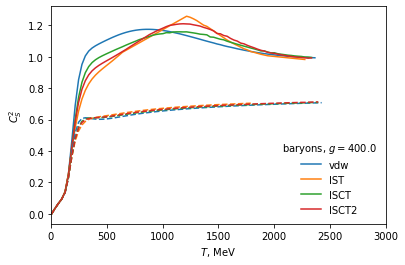

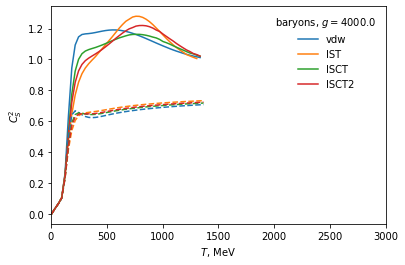

In [40]:
# plots for different eos
g_array = [4., 40.,400.,4000.]

particle_type = 'baryons'
mu = 0.
R = 0.39

for g in g_array:

    b = 1.

    for label in labels:
        filepath = f'cs_sq_fulldata_{particle_type}_b_{b}_{label}_g_{g}_R_{R}_mu_{mu}_.csv'
        df = pd.read_csv(os.path.join(data_folder, filepath))
        mask = df.sp_of_snd_sq.isna()
        df = df[np.invert(mask)]
        plt.plot( df['T'], df['sp_of_snd_sq'], label=label)
    
    plt.gca().set_prop_cycle(None)
    
    b = 0.

    for label in labels:
        filepath = f'cs_sq_fulldata_{particle_type}_b_{b}_{label}_g_{g}_R_{R}_mu_{mu}_.csv'
        df = pd.read_csv(os.path.join(data_folder, filepath))
        mask = df.sp_of_snd_sq.isna()
        df = df[np.invert(mask)]
        plt.plot( df['T'], df['sp_of_snd_sq'], '--')
    
    plt.xlim(0, 3e3)

    plt.xlabel('$T$, MeV')
    plt.ylabel('$C_{S}^2$')

    plt.legend(frameon=False, title=f'{particle_type}, $g={g}$')
    plt.show()

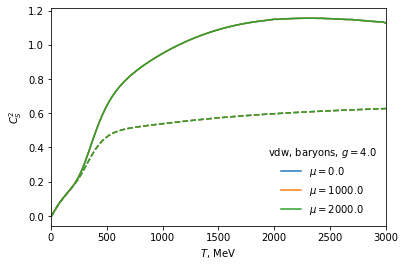

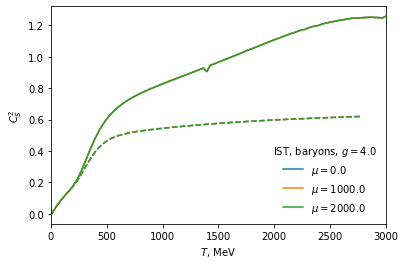

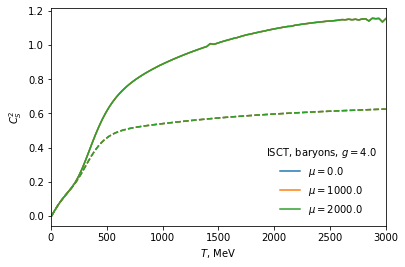

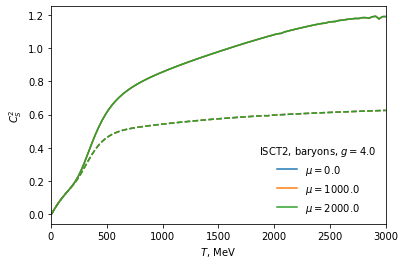

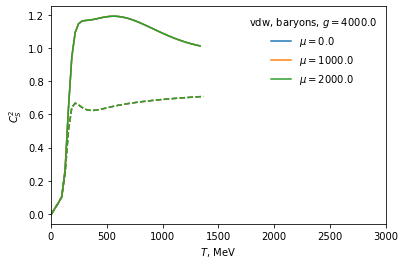

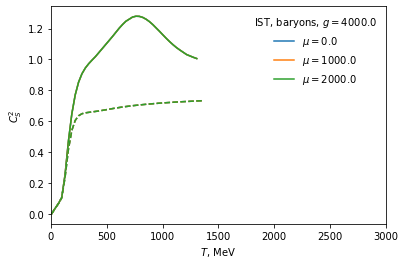

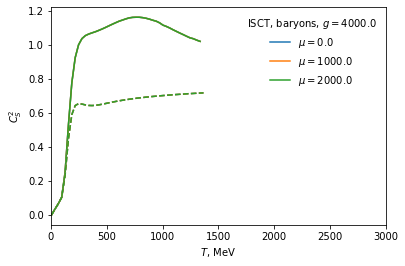

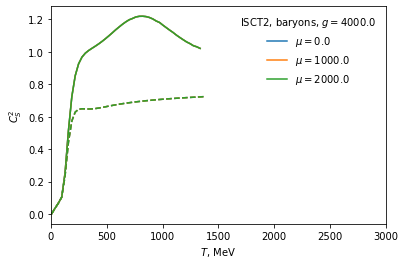

In [45]:
# plots for different mu
g_array = [4., 4000.]

particle_type = 'baryons'
mu_array = [0., 1000., 2000.]
R = 0.39

for g in g_array:
    for label in labels:

        b = 1.
        for mu in mu_array:
            filepath = f'cs_sq_fulldata_{particle_type}_b_{b}_{label}_g_{g}_R_{R}_mu_{mu}_.csv'
            df = pd.read_csv(os.path.join(data_folder, filepath))
            mask = df.sp_of_snd_sq.isna()
            df = df[np.invert(mask)]
            plt.plot( df['T'], df['sp_of_snd_sq'], label=f'$\\mu={mu}$')
        
        plt.gca().set_prop_cycle(None)
        
        b = 0.
        for mu in mu_array:
            filepath = f'cs_sq_fulldata_{particle_type}_b_{b}_{label}_g_{g}_R_{R}_mu_{mu}_.csv'
            df = pd.read_csv(os.path.join(data_folder, filepath))
            mask = df.sp_of_snd_sq.isna()
            df = df[np.invert(mask)]
            plt.plot( df['T'], df['sp_of_snd_sq'], '--')
        
        plt.xlim(0, 3e3)

        plt.xlabel('$T$, MeV')
        plt.ylabel('$C_{S}^2$')

        plt.legend(frameon=False, title=f'{label}, {particle_type}, $g={g}$')
        plt.show()

# pions

# light mesons

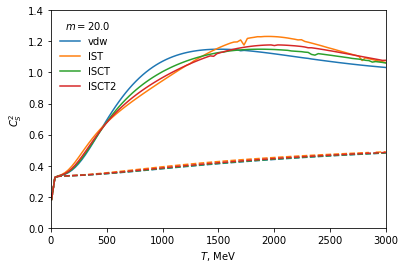

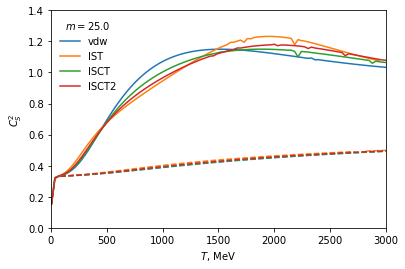

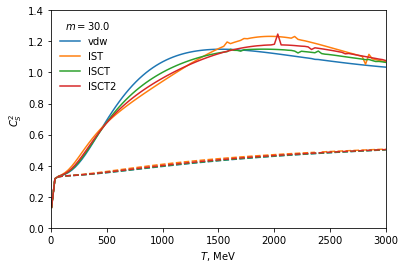

In [23]:
# plots for different masses
m_array = [20., 25., 30.]
mu = 0.
g = 3.
R = 0.4


for m in m_array:
    
    plot_labels = iter(labels)

    particle_type = f'ligth_mes_m_{m}'

    b = 1.
    for label in labels:
        filepath = f'cs_sq_fulldata_{particle_type}_b_{b}_{label}_g_{g}_R_{R}_mu_{mu}_.csv'
        df = pd.read_csv(os.path.join(data_folder, filepath))
        plt.plot( df['T'], df['sp_of_snd_sq'], label=label)
    
    plt.gca().set_prop_cycle(None)
    
    b = 0.
    for label in labels:
        filepath = f'cs_sq_fulldata_{particle_type}_b_{b}_{label}_g_{g}_R_{R}_mu_{mu}_.csv'
        df = pd.read_csv(os.path.join(data_folder, filepath))
        plt.plot( df['T'], df['sp_of_snd_sq'], '--')
    
    
    # plt.hlines(1, -100, 3e3 )

    plt.xlim(0, 3e3)
    plt.ylim(0,1.4)
    
    plt.xlabel('$T$, MeV')
    plt.ylabel('$C_{S}^2$')

    plt.legend(frameon=False, title=f'$m = {m}$')
    plt.show()